<a href="https://colab.research.google.com/github/dylan-brackett/ml-projects/blob/master/stocks/deep_learning_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [103]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, RNN, LSTMCell, Dense, Dropout, LSTM
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.ticker as mtick
import numpy  as np
import pandas as pd
import datetime

from google.colab import files
import io

In [ ]:
# Go to yahoo finance, pick a stock -> Historical Data -> Set Time Period = Max -> Apply -> Download
csv_file = files.upload()

Saving AMPE.csv to AMPE.csv


In [ ]:
# In csv_file[] put the name of the file you uploaded
data = pd.read_csv(io.BytesIO(csv_file['AMPE.csv']))
data = data.drop(['Date'], 1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,3.00,3.75,3.00,3.50,3.50,13700
1,3.75,4.50,3.75,4.50,4.50,16200
2,4.49,4.49,3.75,3.75,3.75,700
3,4.00,4.25,4.00,4.25,4.25,1000
4,4.25,4.25,4.15,4.15,4.15,2300


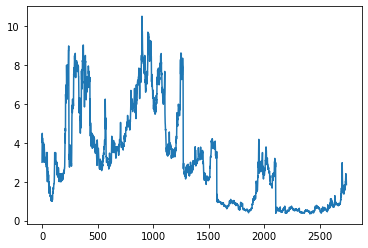

In [ ]:
plt.plot(data['Open'])

In [ ]:
rows = data.shape[0]
cols = data.shape[1]
data = data.values

In [ ]:
train_start = 0
train_end = int(np.floor(0.8*rows))
test_start = train_end
test_end = rows
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [ ]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

scalerX = MinMaxScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.fit_transform(X_test)

scalerY = MinMaxScaler()
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

In [ ]:
# Open price is the the y/label

X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)
y_train = np.expand_dims(y_train, 1)
y_test = np.expand_dims(y_test, 1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
y_train
# Placeholders are for tf1 not tf2
# X = tf.placeholder(dtype=tf.float32, shape=[None, 5])
# Y = tf.placeholder(dtype=tf.float32, shape=[None])

(2193, 1, 5)
(2193, 1, 1)


array([[[0.2591133 ]],

       [[0.33300493]],

       [[0.40591133]],

       ...,

       [[0.01773399]],

       [[0.01773399]],

       [[0.        ]]])

In [ ]:
sequence_length = X_train.shape[0]
n_features = X_train.shape[1]
print(sequence_length)
print(n_features)

model = tf.keras.Sequential([
  Bidirectional(LSTM(256, return_sequences=True), input_shape=(1, 5)),
  Bidirectional(LSTM(256, return_sequences=True), input_shape=(1, 5)),
  Bidirectional(LSTM(256, return_sequences=False), input_shape=(1, 5)),
  Dropout(0.3),
  Dense(1, activation='linear')
])
model.compile(loss='mean_absolute_error', metrics=["mean_absolute_error"], optimizer='rmsprop')

2193
1


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/1000
69/69 [==============================] - 18s 56ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - val_loss: 0.0157 - val_mean_absolute_error: 0.0157
Epoch 2/1000
69/69 [==============================] - 1s 22ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - val_loss: 0.0344 - val_mean_absolute_error: 0.0344
Epoch 3/1000
69/69 [==============================] - 1s 22ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0153 - val_mean_absolute_error: 0.0153
Epoch 4/1000
69/69 [==============================] - 1s 22ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126
Epoch 5/1000
69/69 [==============================] - 1s 22ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - val_loss: 0.0140 - val_mean_absolute_error: 0.0140
Epoch 6/1000
69/69 [==============================] - 1s 21ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - val_loss: 0.0379 - val_mean_absolute_error: 0.0379
Epoch 7/1

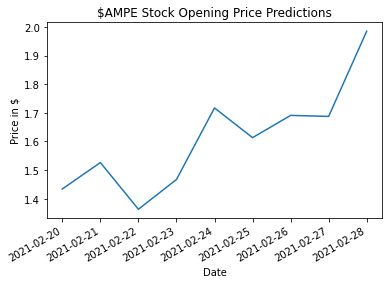

In [108]:
predictVals = scalerY.inverse_transform(model.predict(X_test[-50:]))
predictVals = predictVals.flatten()

x = pd.date_range(start='2/20/2021', end='3/2/2021').tolist()
fig, ax = plt.subplots()
ax.plot(x[0:9], predictVals[0:9])
fig.autofmt_xdate()
plt.title('$AMPE Stock Opening Price Predictions')
plt.ylabel('Price in $')
plt.xlabel('Date')

ax.fmt_xdata = DateFormatter("%Y-%m-%d")